___
### <center> <u> <h1> <strong> Utilisation de la bibliothèque SciPy </strong> </h1> </center>

<h3>
Dans ce notebook on verra comment utiliser la bibliothèque Scipy pour :
    
<ol>
    <li> Gérer des problèmes d'optimisation </li>
    <li> Interpoler des fonctions </li>
    <li> Faire un calcul d'intégration numérique </li>
    <li> Résoudre des équations différentielles </li>
    <li> Réaliser des transformée Fourier </li>
    <li> Resoudre des équation linéaires </li>
    <li> Résoudre des problèmes destatistique </li>

</ol>
</h3>
    
---

<h1> <strong> A - Importation des modules necessaires

In [1]:
################################################################################
##################  Bibliothèque utilitaire mathémlatiques  ####################
################################################################################
import numpy as np
import scipy as sp
################################################################################
##################         Bibliothèque graphique           ####################
################################################################################
import matplotlib.pyplot as plt


<h1> <strong> B - Problème d'optimisation

<h1> <strong> B.1 - Simple problème de minimisation

<h3> <p> Supposons que nous soyons face à un problème dans lequel on a besoin e minimiser une grande donnée en Physique, Mahtémaque, Biologie . . </p>
    <p> On peut par exemple être comptable dans une entreprise donnée et on souhaite trouver le Mois sur les 10 dernière années où le chiffre d'affaire de l'entreprise a été au plus bas. Par ailleurs supposons que ce chifffre d'affaire soit modélisé par la fonction 

$f(t) = (t-3)^{2.6} + 5(t-3)^{5} $ </p>
    <p> Le problème se traduit donc à minimiser la fonction en question
   

In [2]:
def f( t ) :
    return (t-3)**2.6 + 5*(t-3)**5

<h3> Pour se faire, la bibliothèque Scipy offre la possibilité de minimiser des fonctions grâce àla méthode $minimize$ de son module $optimize$

In [3]:
from scipy.optimize import minimize

<h3> La documentation de la fonction peut être parcourue

In [4]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <o

<h3> Comme on peut le voir, pour trouver le minimum en  paramètres de base  il suffit de fournir à la fonction, l'indicatif de la fonction à minimiser et une valeur de départ.

In [5]:
result = minimize( f , x0 = 3.1)

In [6]:
result

      fun: 7.579096494079156e-10
 hess_inv: array([[16.06892249]])
      jac: array([6.34522333e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([3.00031057])

In [7]:
type(result)

scipy.optimize.optimize.OptimizeResult

<h3> La fonction retourne alors un objet qui contient toutes les informations necessaires sur la réponse au problème de minimisation <ul>  
    <li> $result.x$ donne la liste de valeurs de la fonction qui minimise cette dernière; résultat sous forme de list </li>
    <li> $result.fun$ donne la valeur minimale de la question </li>
    <li> $result.status$, $result.success$ et $result.message$ donnent des informations sur le statut de la requête de minimisation </li>
    </ul>

In [8]:
result.x[0]

3.000310570748874

In [9]:
result.fun

7.579096494079156e-10

In [10]:
result.success

True

In [11]:
result.status

0

In [12]:
result.message

'Optimization terminated successfully.'

<h3> Comment on pouvait s'y attendre :<ul> 
    <li> La fonction est minimale pour une valeur proche de 3 </li>
    <li> La valeur minimale de la fonction est proche de 0  </li>
    </ul>

<h1> <strong> B.1 - Problème de minimisation avec contraintes

<h3> <p>La même fonction pourrait être utilisée pour traiter un problème de minimisation imposant plusieurs contraintes sur les variables du problème.</p>
    <p>  Imaginons à présent que le chiffre d'affaire de l'entreprise soit plutot perçu comme une fonction qui ne dépende pas uniquement du nombre de ses employés, de la qualité du service ou des produits qu'elle fourni à la société et de son budget marketing. </p>
    <p>On notera $n$ le nombre d'enployé, $q$ la qualité du service ou des produits qu'elle fourni ou vend et $b$ son budget marketing </p>
    <p> Supposons ensuite que son chiffre d'affaire soit modélisable par la fonction analytique suivante     
    <p> $f(n, q, b) = 2.5n(b-60000-200q)^{2} - 2b(q-10+3n)^{2} +4b^{2}(7n-40-q)^{2} $ </p>
    <p> La question se pose alors de savoir quelle est le chiffre d'affaire minimile que l'entreprise pourrait espérer avoir avec moins de 100 employés, un budget de  inférieur à 10000 € et avec une contrainte supplémentaire qui soit que

$50np - b \geq 0$
    <p>  Toutes les contraintes du problèmes peuvent être resumées comme suit : </p>
    
$$100 - n \geq 0$$
$$10000 -b \geq 0 $$
$$50nq - b \geq 0$$
    <p>il faut aussi garder à l'esprit que $n$ et $b$ restent positifs et $q$ entre 0 et 100 </p>
    
$$n \geq 0$$
$$b \geq 0$$
$$0 \leq q \leq 100$$


- ### <strong> La fonction chiffre d'affaire

In [13]:
def f ( x ) :
    n , q , b = x
    return 2.5*n*( b - 60000 -200*q)**2 -2*b*( q - 10 +3*n )**2 + 4*(b**2)*( 7*n - 40 -q)**2

- ### <strong> Les valeurs autorisées aux variables

In [14]:
bornes = ((0, None), (0,20), (0, None))

- ### <strong> Les contraintes du problème

In [15]:
contraintes =(
    {'type': 'ineq', 'fun': lambda x:  200 - x[0]  },
    {'type': 'ineq', 'fun': lambda x:  10000 - x[2]},
    {'type': 'ineq', 'fun': lambda x:  50*x[0]*x[1] - x[2]},
)

In [16]:
resultat = minimize( f , (1 , 2 , 4000), constraints=contraintes, bounds=bornes, method = 'Powell')

/home/brice_kengni_zanguim/anaconda3/envs/Fast_API/lib/python3.9/site-packages/scipy/optimize/_minimize.py:541: RuntimeWarning: Method Powell cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


In [17]:
resultat

   direc: array([[-1.14170300e-01, -4.22323865e-08,  1.46866525e+04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.40331260e-02,  4.11238519e-02,  2.54945429e+03]])
     fun: -6517483.108781825
 message: 'Optimization terminated successfully.'
    nfev: 1060
     nit: 11
  status: 0
 success: True
       x: array([5.73676792e+00, 1.57400993e-01, 6.00378985e+04])

<h1> <strong> C - Problème d'interpolation

<h3> <p> Supposeez qu'en tant que statisticien, physicien, biologisteou ingénieur vous ayez pour mission de mesure une grandeur physique données qui est censée évoluer avec le temps. Au bout de 30 jours vous avez pu reccueillir un échantillon de 20 mesures qui se présentent comme suit </p>

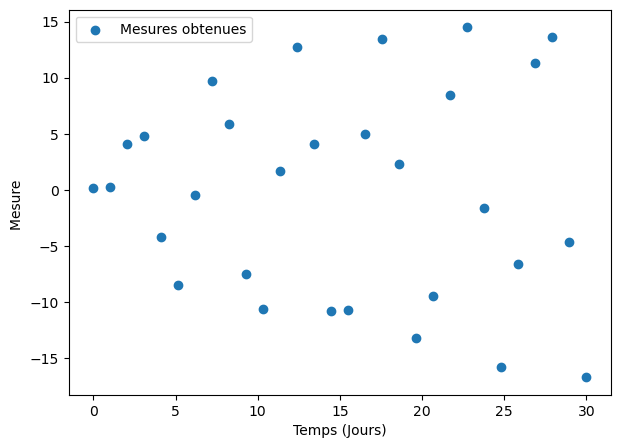

In [18]:
t_min, t_max = 0 , 30
N = 30


def mesure ( t ) : 
    base = 6*np.cos(2*np.pi*t*6/(t_max-t_min) +np.pi)*t**3.3/(1+  2*t + +t**3)
    bruit = np.random.rand(t.size) - np.random.rand(t.size)
    
    return base + bruit

t_sample =  np.linspace(t_min , t_max, N)
t_sample[0] , t_sample[-1] = t_min , t_max
y_sample = mesure ( t_sample)


plt.figure(figsize = (7,5))
plt.scatter(t_sample , y_sample, label= "Mesures obtenues")
plt.xlabel("Temps (Jours)")
plt.ylabel("Mesure ")
plt.legend(loc="upper left")
plt.show()

<h3> <p> Votre objectif à présent est de pouvoir retrouver la courbe générale de la fonction qui permet de retrouver ces valeurs mesurées si possible dans le but de pouvoir prédire des valeurs intermédiaire que vous avez peu être manqué le vintième ou le sixième jour de votre mesure peu être parceque vous aviez oublié, ou vous avez effectué la mesure vous vous l'avez perdu entre temps. </p>
    <p> Le module $interpolate$ de $scipy$ offre la fonction $interp1d$ qui permet de réaliser une telle tâche. </p>

In [19]:
from scipy.interpolate import interp1d

In [20]:
interp1d?

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zeroth, first, 

<h1> <strong> C.1 - Interpolation linéaire

<h3> Dans un premier temps on va réaliser une interpolation linéaire qui consiste à joindre deux points adjacents de la mesure par une droite

In [21]:
t = np.linspace( t_min , t_max , 200)

In [22]:
linear_interpolate = interp1d( t_sample, y_sample, kind='linear')
y_linear = linear_interpolate( t )

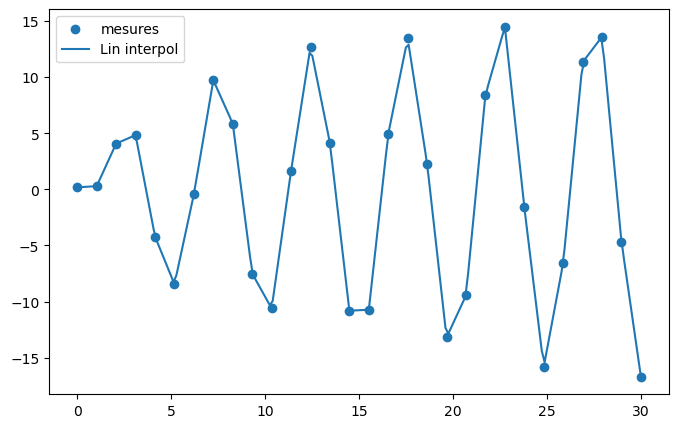

In [23]:
plt.figure(figsize=(8,5))

plt.scatter(t_sample , y_sample , label='mesures')
plt.plot(t , y_linear , label = 'Lin interpol')

plt.legend(loc="upper left")
#plt.ylim(y_linear.min(), y_linear.max()+1)
#plt.xlim(t.min(), t.max())
plt.show()

<h3> Comme on peut le voir la forme de la courbe d'interpolation ne corresponds pas visuellement à ce qu'on pourrait considérer comme une fonction analytique car cette dernière est une fonction continues par morceauux qui est définie sur plusieurs sous domaines séparéments; d'où la necessité d'une méthode d'interpolation plus adaptée

<h1> <strong> C.2 - Interpolation cubique

In [24]:
cubic_interpolate = interp1d( t_sample, y_sample, kind='cubic')
y_cubic = cubic_interpolate( t )

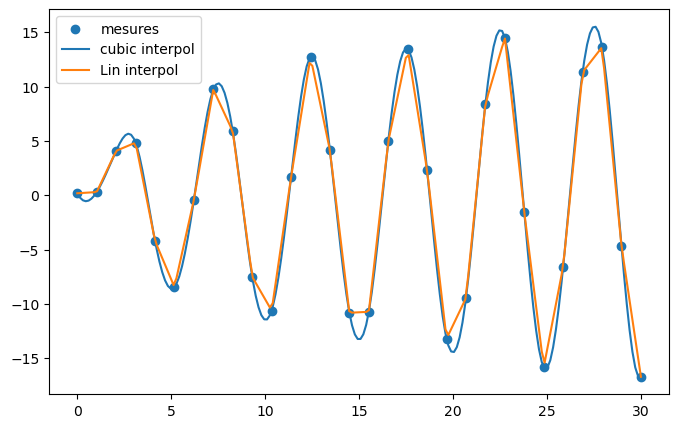

In [25]:
plt.figure(figsize=(8,5))

plt.scatter(t_sample , y_sample , label='mesures')
plt.plot(t , y_cubic , label = 'cubic interpol')
plt.plot(t , y_linear , label = 'Lin interpol')

plt.legend(loc="upper left")
#plt.ylim(y_cubic.min(), y_cubic.max()+2)
#plt.xlim(t.min(), t.max()+5)
plt.show()

<h3> Avec une interpolation cubique on a une courbe qui est un peu plus lisse que celle avec une interpolation simplement linéaire. D'autres méthodes peuvent être utilisées

<h1> <strong> C.3 - Interpolation quadratique

In [26]:
quad_interpolate = interp1d( t_sample, y_sample, kind='quadratic')
y_quad = quad_interpolate( t )

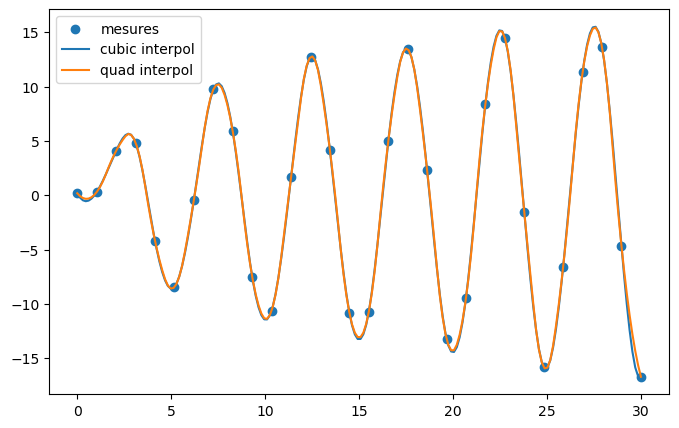

In [27]:
plt.figure(figsize=(8,5))

plt.scatter(t_sample , y_sample , label='mesures')
plt.plot(t , y_cubic , label = 'cubic interpol')
plt.plot(t , y_quad , label = 'quad interpol')

plt.legend(loc="upper left")
#plt.ylim(y_quad.min(), y_quad.max())
#plt.xlim(t.min(), t.max())
plt.show()

<h3> On peut ainsi utiliser l'objet renvoyé par la méthde $interp1d$ pour obtenir des valeurs intermédiaires qu'on n'a pas pu mesurer dans la pratique

In [28]:
t0 = 20

In [29]:
linear_interpolate(t0)

array(-11.95362084)

In [30]:
cubic_interpolate(t0)

array(-14.4628996)

In [31]:
quad_interpolate(t0)

array(-14.3202697)

<h1> <strong> D - Problème de modélisation ( fitting )

<h1> <strong> D.1 - Fitting linéaire

<h3> <p> La position du problème ici est la suivante : on est dans le même cas de figure que dans le problème d'interpolation mais l'object est de trouver l'expression analytique d'un fonction qui s'approche le plus possible de des valeurs discrète obtenues par expérience </p>
    <p> Soient des données obtenues expérimentalement que l'on peut reproduire à l'aide de la fonctiion suivante </p>

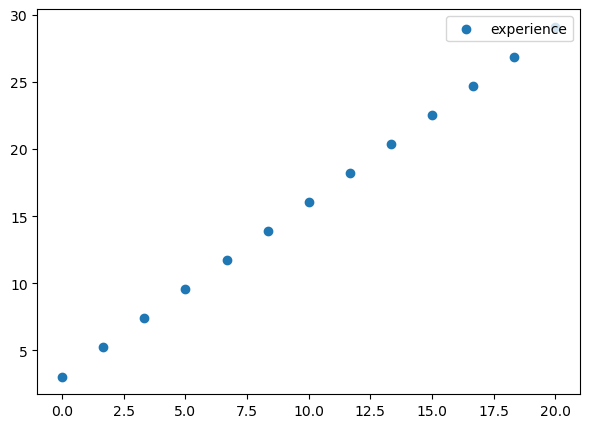

In [32]:
def g( x , bruit = 0.1) :
    return 1.3*x + 3 +  np.random.rand(len(x))*bruit


x_min, x_max = 0 , 20
N = 13
x = np.linspace(x_min, x_max, N)
y_s = g(x)

plt.figure( figsize=(7,5) )

plt.scatter( x , y_s, label ="experience")

plt.legend(loc="upper right")
plt.show()

<h3> <p> La question ici est de connaitre quelle est l'équation de la droite qui permet au mieu de retrouver tous ce nuage de points </p>
    <p>  Si on pose l'équation d'une telle droite sous la forme $$y = ax+b$$ alors e problème consiste à retrouver les paramètre $a$ et $b$ de cette équation; La réslution de cette question est rendue possible grace à l'utilisation de la fonction $curve\_fit$ du module $optimize$ de $scipy$ à qui il faut envoyer la fonction paramétrique ainsi que les données expérimentales avec éventuellement des valeurs guess comme paramètres initiaux </p>

In [33]:
from scipy.optimize import curve_fit

In [34]:
def g_param( x , a , b) :
    return a*x + b

g_fit = curve_fit( g_param, x , y_s , p0=(0,0))

<h3> La valeur des coefficients trouvée est 

In [35]:
g_fit[0]

array([1.29799268, 3.07722408])

<h3> <p> Ce qui est en accord avec les valeurs $1.3$ et $3.$ que j'ai utilisé plus haut dans la fonction $g(x)$ pour la construction des données </p>
    <p> La matrice de covariance est donnée par </p>

In [36]:
np.diag( g_fit[1] )

array([1.81677581e-06, 2.52329978e-04])

<h3> <p> On obtient des covariances qu'on peut considérer comme nulles. </p>
    <p> Remarquez néanmoin que plus on ajoute du bruit plus la covariance est élevée et plus les coefficients obtenus s'éloignes de leur valeurs réelles  </p>

- ### Pas de bruit

In [37]:
g_fit = curve_fit( g_param, x , g(x , 0) , p0=(0,0))
print( f"- Coefficients : \n{g_fit[0]} \n\n- Covariance : \n{ np.diag(g_fit[1]) }" )

- Coefficients : 
[1.3 3. ] 

- Covariance : 
[9.92971772e-34 1.37912745e-31]


- ### Bruit d'amplitude 0.5

In [38]:
g_fit = curve_fit( g_param, x , g(x , 0.5) , p0=(0,0))
print( f"- Coefficients : \n{g_fit[0]} \n\n- Covariance : \n{ np.diag(g_fit[1]) }" )

- Coefficients : 
[1.2956285  3.30050978] 

- Covariance : 
[3.57234745e-05 4.96159370e-03]


- ### Bruit d'amplitude 1

In [39]:
g_fit = curve_fit( g_param, x , g(x , 1) , p0=(0,0))
print( f"- Coefficients : \n{g_fit[0]} \n\n- Covariance : \n{ np.diag(g_fit[1]) }" )

- Coefficients : 
[1.27801393 3.65550824] 

- Covariance : 
[0.00010862 0.0150855 ]


- ### Bruit d'amplitude 4

In [40]:
g_fit = curve_fit( g_param, x , g(x , 4) , p0=(0,0))
print( f"- Coefficients : \n{g_fit[0]} \n\n- Covariance :\n { np.diag(g_fit[1])}" )

- Coefficients : 
[1.33747887 5.01744469] 

- Covariance :
 [0.00248113 0.34460134]


<h1> <strong> D.1 - Fitting linéaire

<h3> <p> La position du problème ici est la suivante : on est dans le même cas de figure que dans le problème d'interpolation mais l'object est de trouver l'expression analytique d'un fonction qui s'approche le plus possible de des valeurs discrète obtenues par expérience </p>
    <p> Soient des données obtenues expérimentalement que l'on peut reproduire à l'aide de la fonctiion suivante </p>

In [41]:
T = .2
a = ( 2000000 + 375000 + 4/13*282750 )*( 1 + .2*(1 - T) )
b = ( 6782750 )*( 1 + .2*(1 - T) )*4/13
print(f"- Montant réel : {round(a)}\n- Montant S : {round(b)}\n- Différence : {round(abs(a-b))}")

- Montant réel : 2855920
- Montant S : 2420920
- Différence : 435000


In [42]:
a

2855920.0000000005

In [43]:
b

2420920.0000000005

In [44]:
abs(a-b)

435000.0

<h1> <strong> E - Différentiation

<h3> <p> Si l'on souhaite trouver les dérivées de la fonction $$f(x) = 5 \sin( 2 x )$$  </p>
    <p> Nous savons que : <ul>  
    <li> Sa dérivée première est : $$f^{( 1 )}(x) = 10 \cos(2 x ) = 10 \sin(2 x + \frac{\pi}{2}) $$ </li>
    <li>  Sa dérivée seconde est : $$f^{( 2 )}(x) = -20 \sin(2 x) = 20 \sin(2x + \pi) $$ </li>
    <li>  Sa dérivée troisième  est : $$f^{( 3 )}(x)= -40 \cos(2 x ) = 40 \sin(2 x + \frac{3\pi}{2}) $$ </li>
    </ul>
  
<h3> <strong> Importation de la fonction necessaire

In [45]:
from scipy.misc import derivative

<h3> <strong> Fonction et dérivées

In [46]:
def f(x): 
    return 5*np.sin(2*x)


x = np.linspace(0, 6, 300)

df1 =  derivative(f, x, dx=1e-5) 
df2 = derivative(f, x, dx=1e-5, n=2)
df3 = derivative(f , x , dx =1e-4 , n = 3, order = 7)

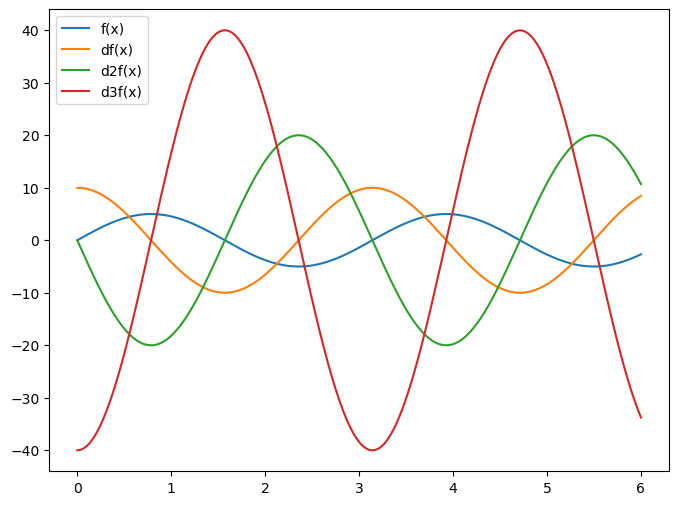

In [47]:
plt.figure(figsize=(8,6))

plt.plot(x, f(x) , label ="f(x)")
plt.plot(x, df1 , label = "df(x)")
plt.plot(x, df2 , label = "d2f(x)" )
plt.plot(x , df3 , label = "d3f(x)")

plt.legend(loc="upper left")
#plt.grid()
plt.show()

In [48]:
print(f"- Max(df1)/Max(f) = {np.max(df1)/np.max(f(x))}\n- Max(df2)/Max(f) = {np.max(df2)/np.max(f(x))}\n- Max(df3)/Max(f) = {np.max(df3)/np.max(f(x))}\n")

- Max(df1)/Max(f) = 2.0000311247915175
- Max(df2)/Max(f) = 4.000057251662888
- Max(df3)/Max(f) = 7.999626247396776



<h3> Comme on pouvait s'y attendre  : <ul> 
    <li> Les dérivées successives sont des fonctions sinusoidailes  </li>
    <li> Les dérivés succéssives sont des fonctions en opposition de phase  </li>
    <li> D'une dérivée à l'autre, le ratio d'amplitude est de 2 </li>
    </ul>

<h1> <strong> F - Équations différentielles

<h1> <strong> F.1 - Dérivées de premier ordre

<h3> <p> Soit une particule de masse $m$ évoluant dans un champ de force uniforme $\vec F$; l'équation du mouvement de ce corps est donné par la seconde loi de Newton : $$m\frac{d \vec v }{dt} = \vec F $$ que l'on peut encore reécrire sous la forme : $$ \frac{d \vec v}{dt} = \frac{1}{m} \vec F  $$ Sous la condition initiale $\vec v(t=0) = \vec 0$, la solution de l'équation précédente s'écrit alors :  $$ \vec v(t) = \frac{1}{m}\vec F t $$ </p> 
    <p> Dans le cas particulier d'un corps de masse $m = 10 kg$ sur le quel s'exerce une force de module $|\vec F| = 100 N$, l'expression du module de la vitesse du corps s'écrit : $$ |\vec v(t)| = 10t $$ </p>
    <p>  La vitesse de la particule évolue donc linéairement dans le temps  </p>
    <p> On peut résoudre cette équation différentielle en utilisant la fonction $odeint$ du module $integrate$ de $scipy$ </p>

In [49]:
from scipy.integrate import odeint

In [50]:
t = np.linspace(0, 2, 500)

<h3> definition de l'équation différentielle

In [51]:
def dv_over_dt(v, t):
    m = 10
    f = 100
    return 1/m*f

<h3> Résolution de l'équation différentielle

In [52]:
v0 = 0
solution_0 = odeint(dv_over_dt, v0, t)

In [53]:
solution_0.shape

(500, 1)

In [54]:
v_solution_0 = solution_0.T[0]

<h3> Tracé du graph

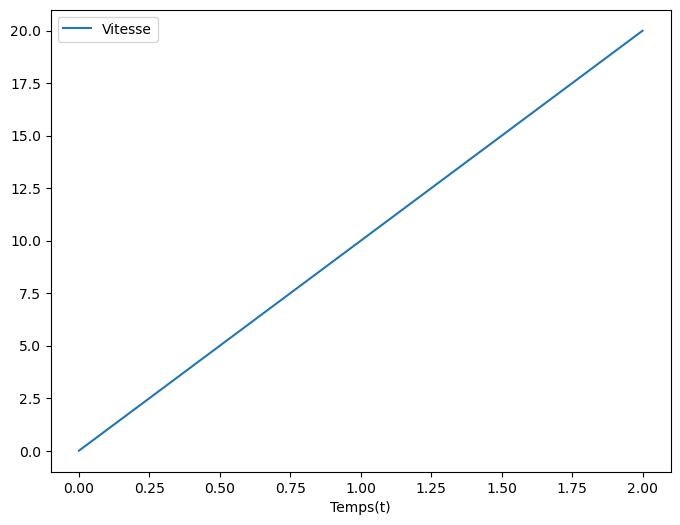

In [55]:
plt.figure(figsize=(8,6))

plt.plot(t, v_solution_0, label="Vitesse")

plt.xlabel("Temps(t)")

plt.legend()
plt.show()

<h3> <p> On obtient bien un graph qui présente une variation linéaire de la vitesse qui reste en parfait accord avec la formulation théorique $$| \vec v| = 10t$$ </p>
    <p> Si à présent on considère le corps évoluant dans ce champ de forces uniforme $\vec F$ auquel vient s'ajouter des forces de friction  que l'on peut modéliser comme proportionelle au module de la vitesse tout en s'y opposant en orientation ( frottement ); l'équation du mouvement devient alors : 
        $$ m \frac{d \vec v(t)}{dt} = \vec F - \beta \vec v(t) $$ où $\beta$ est une constante positive qui traduit l'intensité de la force de frottement. L'équation du mouvement se reécrit alors : $$ \frac{d \vec v(t)}{dt} = \frac{1}{m} \vec F - \frac{\beta}{m}\vec v(t) $$
     <p> La solution de cette équation s'écrit alors en tenant compte des conditions initiales : 
         $$\vec v(t) = \frac{\vec F}{\beta}( 1 - e^{-\frac{\beta}{m} t} ) $$
         Pour un coefficient de frottement $\beta = 10$, l'expression devient alors :
         $$\vec v(t) = 10( 1 - e^{- t} )\frac{\vec F}{|\vec F|} $$
         Comparons ce résultat avec celui donné par la méthode d'intégration de $scipy$

<h3> definition de l'équation différentielle

In [56]:
m = 10
f = 100
beta = 10

def dv_over_dt(v, t):
    return f/m - beta/m*v

def solution_théorique ( t ): 
    return (f/beta)*(1 - np.exp(-beta/m*t))

<h3> Résolution de l'équation différentielle

In [57]:
v0 = 0
solution_1 = odeint(dv_over_dt, v0, t)

In [58]:
v_solution_1 = solution_1.T[0]

<h3> Tracé du graph

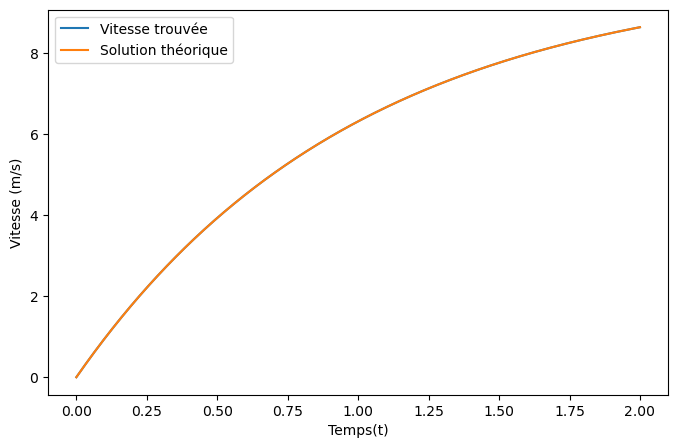

In [59]:
plt.figure(figsize=(8,5))

plt.plot(t, v_solution_1, label="Vitesse trouvée")
plt.plot(t , solution_théorique(t) , label ="Solution théorique")

plt.xlabel("Temps(t)")
plt.ylabel("Vitesse (m/s)")

plt.legend()
plt.show()

<h3> <p> Comme on peut le voir, les deux courbes se supperposent parfaitement. </p> 
    <p> Si par contre le corps avolue dans un champ de forces uniforme $\vec F$ avec des forces de friction proportionelles au  carré du module de la vitesse l'équation du mouvement devient alors : 
        $$ m \frac{d \vec v(t)}{dt} = \vec F - \beta   |\vec v(t)|^2 \frac{\vec v}{|\vec v|} $$ où $\beta$ est une constante positive 
     <p> La solution de cette équation s'écrirait alors en tenant compte des conditions initiales : 
         $$|\vec v(t)| =  \sqrt{\frac{f}{\beta}} \tanh(\frac {\sqrt{f\beta}}{m}t) $$  
         Pour un coefficient de frottement $\beta = 10$, l'expression devient alors :
         $$|\vec v(t)| =  \sqrt{10}\tanh(\sqrt{10}t) $$
         Toujours, Comparons ce résultat avec celui donné par la méthode d'intégration de $scipy$

<h1> Équation différentielle à résouudre pour aboutir à la solution :  $$x' + \beta x^2 + \alpha = 0$$

In [60]:
m = 10
f = 100
beta = 10

def dv_over_dt(v, t):
    return f/m - (beta/m)*v**2

def solution_théorique_2 ( t ): 
    return np.sqrt(f/beta)*np.tanh(t*np.sqrt(f*beta)/m)

<h3> Résolution de l'équation différentielle

In [61]:
v0 = 0
solution_2 = odeint(dv_over_dt, v0, t)

In [62]:
v_solution_2 = solution_2.T[0]

<h3> Tracé du graph

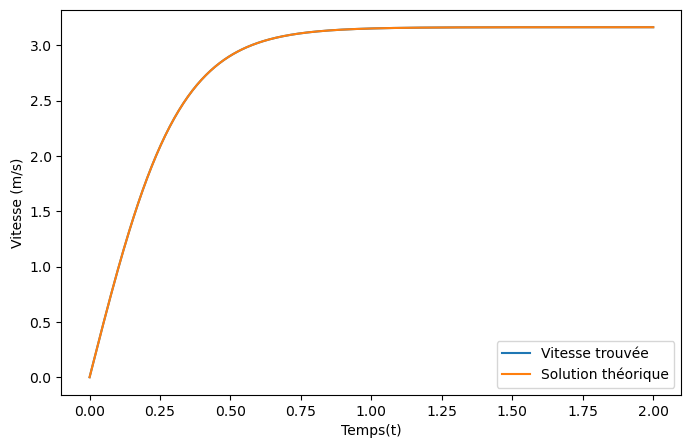

In [63]:
plt.figure(figsize=(8,5))

plt.plot(t, v_solution_2, label="Vitesse trouvée")
plt.plot(t , solution_théorique_2(t) , label ="Solution théorique")

plt.xlabel("Temps(t)")
plt.ylabel("Vitesse (m/s)")

plt.legend()
plt.show()

<h2> Petit récap des 3 solutions de l'équation du mouvement

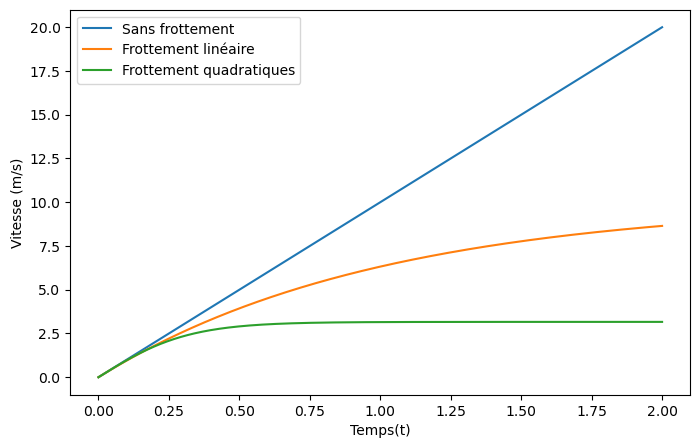

In [64]:
plt.figure(figsize=(8,5))

plt.plot(t, v_solution_0, label="Sans frottement")
plt.plot(t , v_solution_1 , label ="Frottement linéaire")
plt.plot(t , v_solution_2, label ="Frottement quadratiques")


plt.xlabel("Temps(t)")
plt.ylabel("Vitesse (m/s)")

plt.legend()
plt.show()

<h2> À mésure que les forces de frottements ont une plus forte dépendances à la vitesse, la vitesse limite de cette dernière se réduit de plus en plus.

<h1> <strong> F.2 - Système d'équations différentielles du premier ordre

<h3> <p> On consière le système de 2 équation différentiel en $x$ suivant
    $$ y_1' = 4y_1 + y_2^5 + 3x^{2.5} \hspace{10mm} y_1(0)=0
    $$ $$ y_2' = -2y_1 + 2.5y_2^3 - y_1y_2\cos(3x + 1) \hspace{10mm} y_2(0)=0$$
    <p> Si on note $A = (y_1 , y_2)$ alors la fonction qui devra être transmise à la méthode scipy de résolution devra renvoyer la valeur de $(\frac{dy_1}{dx},\frac{dy_2}{dx}  )$ </p>
    <p> On pourra ainsi noter $\frac{dA}{dx}$ cette fonction qui pourra prendre comme valeurs en entrée : $A$ et $x$

In [65]:
def dA_over_dx(A, x):
    y1, y2 = A
    return [ y1 + 2*y2  + x**2 , -y1 + y2 - x]

In [66]:
# Conditions initiales
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)


x = np.linspace(0, 5, 500)
sol = odeint(dA_over_dx, S_0, x)

In [67]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

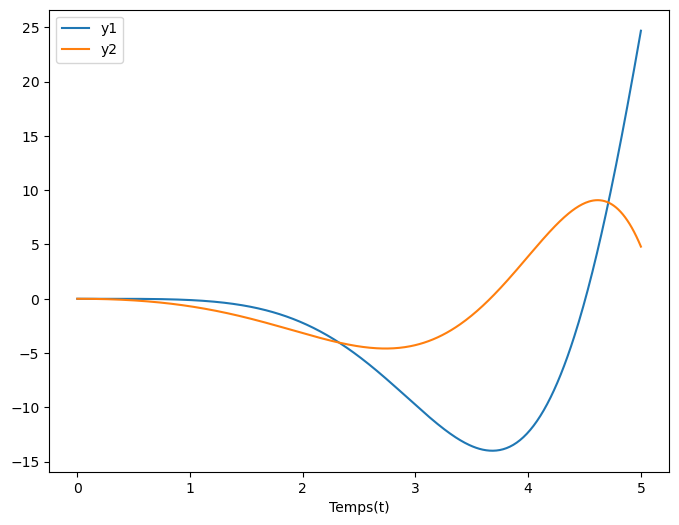

In [68]:
plt.figure(figsize=(8,6))

plt.plot(x, y1_sol, label= "y1")
plt.plot(x, y2_sol, label = "y2")
plt.xlabel("Temps(t)")

plt.legend()
plt.show()

<h1> <strong> F.3 - Équations différentielles du second ordre

<h3> <p> Considérons l'équation d'évolution d'un pendule defini comme suit : 

$$\theta'' - \sin(\theta) = 0$$
    Pour résoudre une telle équation tout en utilisant la méthode précédante de $scipy$, il est necessaire de transformer l'équation de manière à obtenir une système de 2 équation du premier ordre; en effet on peut poser : 
$$ \frac{d \theta}{dt} = \omega $$
    L'équation précédante se transforme alors en un système de 2 équations différentielles d'ordre 1 à savoir : 
$$ \frac{d \omega}{dt} = \sin(\theta) $$
$$ \frac{d \theta}{dt} = \omega $$

In [69]:
def dA_over_dt(A, t):
    omega , theta = A
    return [ np.sin(theta) , omega  ]

In [70]:
theta_0 = np.pi/5
omega_0 = 0
A_0 = ( omega_0 , theta_0 )

t = np.linspace(0, 8*np.pi, 600)
sol = odeint(dA_over_dt, A_0, t)
omega , theta = sol.T

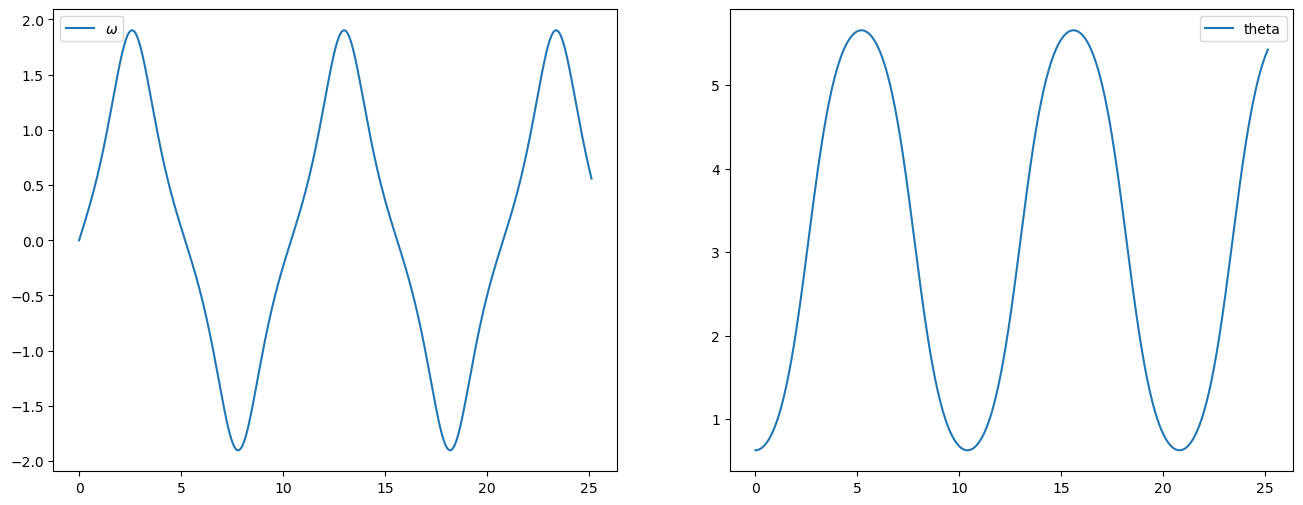

In [71]:
fig , ax = plt.subplots( 1 , 2 , figsize= (16,6))

ax[0].plot(t, omega , label = "$\omega$")
ax[0].legend()

ax[1].plot(t, theta , label = "theta")
ax[1].legend()

plt.show()

---

- ## <strong> Authors </strong>

 #### <ul> <p> - <strong><a href="https://www.linkedin.com/in/brice-kengni-zanguim/" target="_blank">Brice KENGNI ZANGUIM :</a> </strong></p> <ul> Artificial Intelligence Engeneer at home and holds a PhD in Nano-physic. His research focused on using <strong>Machine Learning, Deep Learning, Signal Processing, Natural langage Processing, Computer Vision and so one</strong> to figure out how the world behave and impact human cognition. Brice KENGNI ZANGUIM has been working at home on mastering his own AI projects in many domains while seeking for a position in a company. </ul></ul>


---

- ## <strong> Other Contributors </strong>

#### <ul>None</ul>

---

- ## <strong> Change Log </strong>

|  Date (DD-MM-YYYY) |  Version | Changed By  |  Change Description |  Purpose  |
|---|---|---|---|---|
| 19- 03 - 2023 | 1.0 | Brice KENGNI ZANGUIM | Updated the file | Mem,save |
|-|-|-|-|
|   |   |   |   |   |

### <h3 align="center"> © BKZ Corporation 2023. All rights reserved. <h3/>
---